# Resampling Along the Spatial Dimensions
Xarray provides simple but powerful ways to resample datasets. This notebook covers resampling along a spatial dimensions. In contrast to resampling along a time dimension, an integer number of spatial units is passed to each spatial dimension within the `.coarsen()` function. The examples below involve downsampling to lower spatial resolution, although it is also possible to upsample data to higher spatial resolution than the original using interpolation.

## Setup

In [4]:
import xarray as xr

In [5]:
ds = xr.open_dataset('../Data/netCDF/ds_BM_NP.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 36, y: 200, x: 170)
Coordinates:
  * y            (y) float64 4.466e+06 4.466e+06 ... 4.447e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.604e+06 9.604e+06 ... 9.62e+06 9.62e+06
    spatial_ref  int32 ...
  * time         (time) datetime64[ns] 2018-01-31 2018-02-28 ... 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 ...
    nbart_blue   (time, y, x) float32 ...
    nbart_green  (time, y, x) float32 ...
    nbart_nir_1  (time, y, x) float32 ...
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

## Resample from Hectares to Square Kilometres
The coordinates of the supplied dataset are in measured in metres. By inspecting the coordinates along either the x or y coordinates it can be seen that the spatial resolution is 100m (hectares). In this example the spatial resolution is downsampled to 1000m (square kilometres). This is achieved by passing `x=10`, `y=10` to the `.coarsen()` function, then finding the mean of the original pixels contained within the new pixel. For this example, time is also downsampled to years using the median. See [Resampling Along the Time Dimension](Resampling_Along_the_Time_Dimension.ipynb) for further details.

In [17]:
ds_sqkm = (ds.resample(time='Y')
               .median()
               .coarsen(x=10, y=10)
               .mean()
              )
ds_sqkm

<xarray.Dataset>
Dimensions:      (time: 3, y: 20, x: 17)
Coordinates:
  * y            (y) float64 4.466e+06 4.465e+06 ... 4.448e+06 4.447e+06
  * x            (x) float64 9.604e+06 9.605e+06 ... 9.619e+06 9.62e+06
    spatial_ref  int32 3308
  * time         (time) datetime64[ns] 2018-12-31 2019-12-31 2020-12-31
Data variables:
    nbart_red    (time, y, x) float32 401.7 378.1 335.4 ... 268.3 274.3 262.6
    nbart_blue   (time, y, x) float32 250.5 240.2 216.9 ... 181.3 176.5 175.4
    nbart_green  (time, y, x) float32 374.5 361.8 323.2 ... 295.3 284.3 276.4
    nbart_nir_1  (time, y, x) float32 1.83e+03 1.849e+03 ... 1.904e+03 1.9e+03
Attributes:
    crs:           EPSG:3308
    grid_mapping:  spatial_ref

Inspecting the x and y dimensions after resampling shows that the spatial resolution is now 1000m. The new dataset can be visualised using a facetgrid RGB plot.

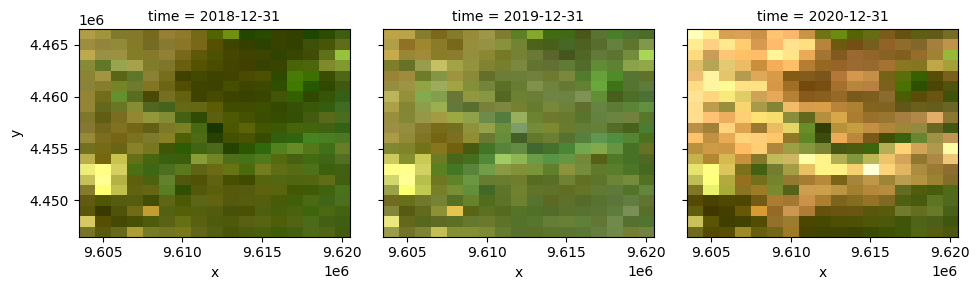

In [11]:
(ds_sqkm[['nbart_red','nbart_green','nbart_blue']]
 .to_dataarray()
 .plot.imshow(col='time', robust=True))